In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [46]:
import pandas as pd

trip_data_file = "data/trip_data_4.csv"
trip_fare_file = "data/trip_fare_4.csv"

trips = pd.read_csv(trip_data_file)
fares = pd.read_csv(trip_fare_file)

In [47]:
full_tripdata = pd.merge(left=trips,right=fares, how='left', left_on=['medallion',' hack_license',' vendor_id',' pickup_datetime'], right_on=['medallion',' hack_license',' vendor_id',' pickup_datetime'])
full_tripdata = full_tripdata.drop_duplicates()

In [48]:
full_tripdata.columns

Index([u'medallion', u' hack_license', u' vendor_id', u' rate_code',
       u' store_and_fwd_flag', u' pickup_datetime', u' dropoff_datetime',
       u' passenger_count', u' trip_time_in_secs', u' trip_distance',
       u' pickup_longitude', u' pickup_latitude', u' dropoff_longitude',
       u' dropoff_latitude', u' payment_type', u' fare_amount', u' surcharge',
       u' mta_tax', u' tip_amount', u' tolls_amount', u' total_amount'],
      dtype='object')

# Prepare Time

In [49]:
full_tripdata[" pickup_datetime"] = pd.to_datetime(full_tripdata[" pickup_datetime"])
full_tripdata[" dropoff_datetime"] = pd.to_datetime(full_tripdata[" dropoff_datetime"])

full_tripdata["weekday"] = full_tripdata[" pickup_datetime"].dt.dayofweek
full_tripdata["hourofday"] = full_tripdata[" pickup_datetime"].dt.hour

In [50]:
full_tripdata[" pickup_datetime"].describe()

count                15101650
unique                2212633
top       2013-04-19 22:41:00
freq                      439
first     2013-04-01 00:00:00
last      2013-04-30 23:59:58
Name:  pickup_datetime, dtype: object

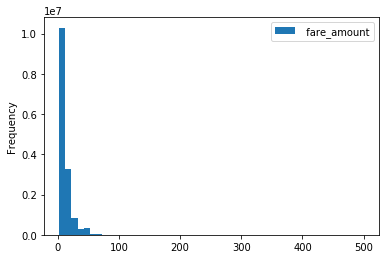

In [7]:
full_tripdata[[" fare_amount"]].plot.hist(bins=50)

/home/ma_emali/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


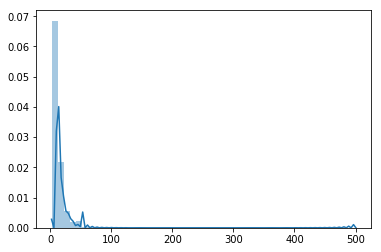

In [8]:
sns.distplot(full_tripdata[[" fare_amount"]],norm_hist=True)

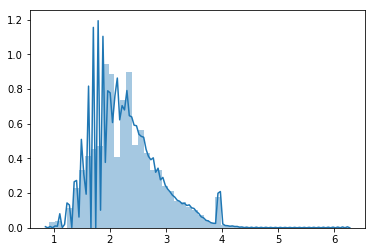

In [11]:
full_tripdata["log_fare_amount"] = np.log(full_tripdata[" fare_amount"])
#full_tripdata[["log_fare_amount"]].plot.hist(bins=50)
sns.distplot(full_tripdata[["log_fare_amount"]],norm_hist=True)

In [12]:
full_tripdata = full_tripdata.drop(columns=['medallion',' hack_license',' vendor_id',' rate_code',' store_and_fwd_flag'])

In [13]:
full_tripdata.columns

Index([u' pickup_datetime', u' dropoff_datetime', u' passenger_count',
       u' trip_time_in_secs', u' trip_distance', u' pickup_longitude',
       u' pickup_latitude', u' dropoff_longitude', u' dropoff_latitude',
       u' payment_type', u' fare_amount', u' surcharge', u' mta_tax',
       u' tip_amount', u' tolls_amount', u' total_amount', u'weekday',
       u'hourofday', u'log_fare_amount'],
      dtype='object')

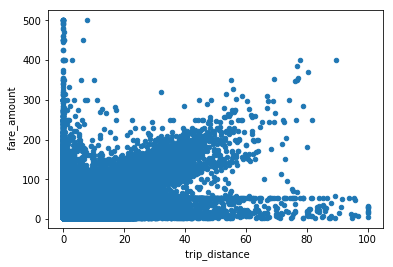

In [14]:
columnName = ' trip_distance'

data = pd.concat([full_tripdata[' fare_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' fare_amount')

In [15]:
#check data whose trip distance is 0 

zero_distance = full_tripdata.loc[(full_tripdata[' trip_distance'] == 0)]

zero_distance.describe()

passenger_count   trip_time_in_secs   trip_distance  \
count     112574.000000       112574.000000        112574.0   
mean           1.361771          434.201743             0.0   
std            0.924213          758.008016             0.0   
min            0.000000            0.000000             0.0   
25%            1.000000            2.000000             0.0   
50%            1.000000           60.000000             0.0   
75%            1.000000          566.000000             0.0   
max            6.000000        10607.000000             0.0   

        pickup_longitude   pickup_latitude   dropoff_longitude  \
count      112574.000000     112574.000000       112428.000000   
mean          -61.842935         34.056795          -56.451246   
std            27.409949         15.222716           31.479355   
min           -79.313148        -73.954559          -79.313171   
25%           -73.987427         40.648392          -73.986742   
50%           -73.962673         40.744041          -73.962700   
75%           -73.790054         40.762871          -73.776749   
max            73.937775         46.331844           73.937782   

        dropoff_latitude    fare_amount      surcharge        mta_tax  \
count      112428.000000  112574.000000  112574.000000  112574.000000   
mean           31.087191      22.217774       0.219120       0.436153   
std            17.432773      29.096689       0.341642       0.166875   
min           -73.938347       2.500000       0.000000       0.000000   
25%            40.641563       2.500000       0.000000       0.500000   
50%            40.741465       9.000000       0.000000       0.500000   
75%            40.761021      38.000000       0.500000       0.500000   
max            46.331844     500.000000       9.000000       0.500000   

          tip_amount   tolls_amount   total_amount        weekday  \
count  112574.000000  112574.000000  112574.000000  112574.000000   
mean        2.562753       0.728185      26.163985       2.956846   
std         5.674802       2.054799      32.756457       2.057488   
min         0.000000       0.000000       2.500000       0.000000   
25%         0.000000       0.000000       4.000000       1.000000   
50%         0.000000       0.000000      11.000000       3.000000   
75%         2.400000       0.000000      45.380000       5.000000   
max       198.000000      20.000000     600.000000       6.000000   

           hourofday  log_fare_amount  
count  112574.000000    112574.000000  
mean       12.578588         2.359961  
std         6.610865         1.240157  
min         0.000000         0.916291  
25%         7.000000         0.916291  
50%        13.000000         2.197225  
75%        18.000000         3.637586  
max        23.000000         6.214608

In [16]:
columnName = ' trip_distance'
print full_tripdata[columnName].describe()

#full_tripdata.astype(bool).sum(axis=0)

count    1.510165e+07
mean     2.863119e+00
std      3.344897e+00
min      0.000000e+00
25%      1.040000e+00
50%      1.780000e+00
75%      3.200000e+00
max      1.000000e+02
Name:  trip_distance, dtype: float64


In [54]:
full_tripdata.describe()

rate_code   passenger_count   trip_time_in_secs   trip_distance  \
count  1.510165e+07      1.510165e+07        1.510165e+07    1.510165e+07   
mean   1.033286e+00      1.709036e+00        7.466120e+02    2.863119e+00   
std    3.452104e-01      1.385628e+00        5.505049e+02    3.344897e+00   
min    0.000000e+00      0.000000e+00        0.000000e+00    0.000000e+00   
25%    1.000000e+00      1.000000e+00        3.600000e+02    1.040000e+00   
50%    1.000000e+00      1.000000e+00        6.000000e+02    1.780000e+00   
75%    1.000000e+00      2.000000e+00        9.600000e+02    3.200000e+00   
max    2.100000e+02      9.000000e+00        1.080000e+04    1.000000e+02   

        pickup_longitude   pickup_latitude   dropoff_longitude  \
count       1.510165e+07      1.510165e+07        1.510150e+07   
mean       -7.273268e+01      4.006773e+01       -7.269042e+01   
std         9.737401e+00      6.959056e+00        9.866365e+00   
min        -2.323420e+03     -3.481141e+03       -2.771290e+03   
25%        -7.399213e+01      4.073512e+01       -7.399143e+01   
50%        -7.398172e+01      4.075281e+01       -7.398006e+01   
75%        -7.396676e+01      4.076754e+01       -7.396362e+01   
max         2.228722e+03      3.210393e+03        2.228746e+03   

        dropoff_latitude   fare_amount     surcharge       mta_tax  \
count       1.510150e+07  1.510165e+07  1.510165e+07  1.510165e+07   
mean        4.004676e+01  1.227533e+01  3.266793e-01  4.983180e-01   
std         6.980866e+00  9.962090e+00  3.673142e-01  2.895120e-02   
min        -3.547898e+03  2.500000e+00  0.000000e+00  0.000000e+00   
25%         4.073417e+01  6.500000e+00  0.000000e+00  5.000000e-01   
50%         4.075333e+01  9.500000e+00  0.000000e+00  5.000000e-01   
75%         4.076832e+01  1.400000e+01  5.000000e-01  5.000000e-01   
max         3.577126e+03  5.000000e+02  1.500000e+01  5.000000e-01   

         tip_amount   tolls_amount   total_amount       weekday     hourofday  
count  1.510165e+07   1.510165e+07   1.510165e+07  1.510165e+07  1.510165e+07  
mean   1.345724e+00   2.447328e-01   1.469078e+01  2.911572e+00  1.358356e+01  
std    2.132233e+00   1.186223e+00   1.194376e+01  1.992267e+00  6.467464e+00  
min    0.000000e+00   0.000000e+00   2.500000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00   0.000000e+00   8.000000e+00  1.000000e+00  9.000000e+00  
50%    1.000000e+00   0.000000e+00   1.100000e+01  3.000000e+00  1.400000e+01  
75%    2.000000e+00   0.000000e+00   1.650000e+01  5.000000e+00  1.900000e+01  
max    2.000000e+02   2.000000e+01   6.281000e+02  6.000000e+00  2.300000e+01

# Remove trips whose trip_time, trip_distance, hour, weekday, coordinates is 0

In [58]:
full_tripdata.loc[(full_tripdata[' dropoff_latitude'] > 0.0)].describe()

rate_code   passenger_count   trip_time_in_secs   trip_distance  \
count  1.484178e+07      1.484178e+07        1.484178e+07    1.484178e+07   
mean   1.030031e+00      1.711320e+00        7.483122e+02    2.870866e+00   
std    3.241665e-01      1.387472e+00        5.497945e+02    3.347395e+00   
min    0.000000e+00      0.000000e+00        0.000000e+00    0.000000e+00   
25%    1.000000e+00      1.000000e+00        3.600000e+02    1.050000e+00   
50%    1.000000e+00      1.000000e+00        6.000000e+02    1.790000e+00   
75%    1.000000e+00      2.000000e+00        9.600000e+02    3.200000e+00   
max    2.100000e+02      9.000000e+00        1.080000e+04    1.000000e+02   

        pickup_longitude   pickup_latitude   dropoff_longitude  \
count       1.484178e+07      1.484178e+07        1.484178e+07   
mean       -7.392576e+01      4.072535e+01       -7.396276e+01   
std         2.730825e+00      4.531501e+00        2.183489e+00   
min        -2.323420e+03     -3.481141e+03       -2.771290e+03   
25%        -7.399229e+01      4.073651e+01       -7.399161e+01   
50%        -7.398199e+01      4.075341e+01       -7.398047e+01   
75%        -7.396782e+01      4.076786e+01       -7.396499e+01   
max         1.498741e+03      3.210393e+03        2.228746e+03   

        dropoff_latitude   fare_amount     surcharge       mta_tax  \
count       1.484178e+07  1.484178e+07  1.484178e+07  1.484178e+07   
mean        4.075368e+01  1.224480e+01  3.271066e-01  4.985234e-01   
std         2.393945e+00  9.808283e+00  3.673460e-01  2.713129e-02   
min         1.225000e-03  2.500000e+00  0.000000e+00  0.000000e+00   
25%         4.073556e+01  6.500000e+00  0.000000e+00  5.000000e-01   
50%         4.075394e+01  9.500000e+00  0.000000e+00  5.000000e-01   
75%         4.076857e+01  1.400000e+01  5.000000e-01  5.000000e-01   
max         3.577126e+03  5.000000e+02  1.500000e+01  5.000000e-01   

         tip_amount   tolls_amount   total_amount       weekday     hourofday  
count  1.484178e+07   1.484178e+07   1.484178e+07  1.484178e+07  1.484178e+07  
mean   1.342205e+00   2.446493e-01   1.465729e+01  2.911496e+00  1.358870e+01  
std    2.108865e+00   1.185567e+00   1.179105e+01  1.992262e+00  6.466321e+00  
min    0.000000e+00   0.000000e+00   2.500000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00   0.000000e+00   8.000000e+00  1.000000e+00  9.000000e+00  
50%    1.000000e+00   0.000000e+00   1.100000e+01  3.000000e+00  1.400000e+01  
75%    2.000000e+00   0.000000e+00   1.650000e+01  5.000000e+00  1.900000e+01  
max    2.000000e+02   2.000000e+01   6.281000e+02  6.000000e+00  2.300000e+01

In [64]:
#full_tripdata = full_tripdata.loc[(full_tripdata[' pickup_longitude'] != 0) & (full_tripdata[' pickup_latitude'] != 0) & (full_tripdata[' dropoff_latitude'] != 0) & (full_tripdata[' dropoff_latitude'] != 0)]
#  full_tripdata2 = full_tripdata.loc[(full_tripdata[' pickup_longitude'] < -72.0) 
#                                   & (full_tripdata[' pickup_latitude'] > 30.0) 
#                                   & (full_tripdata[' dropoff_latitude'] < -72.0) 
#                                   & (full_tripdata[' dropoff_latitude'] > 30.0)]

#full_tripdata = full_tripdata.loc[(full_tripdata[' trip_distance'] != 0) & (full_tripdata[' trip_time_in_secs'] != 0)]

#full_tripdata = full_tripdata.loc[(full_tripdata['weekday'] != 0) & (full_tripdata['hourofday'] != 0)]

#remove outliers
full_tripdata2 = full_tripdata.loc[(full_tripdata[' dropoff_latitude'] > 0.0)]

# print full_tripdata2.count

measuredata = pd.concat([full_tripdata2[' pickup_longitude'],
                        full_tripdata2[' pickup_latitude'],
                         full_tripdata2[' dropoff_longitude'],
                         full_tripdata2[' dropoff_latitude'],
                        # full_tripdata[' fare_amount'],
                        # np.log(full_tripdata[' trip_time_in_secs']+1)，
                        # full_tripdata[' tip_amount'],
                        ],axis=1)

#remove data out of two standard deviation

full_tripdata2 = full_tripdata2[(np.abs(stats.zscore(measuredata)) < 3).all(axis=1)]
full_tripdata2.describe()
full_tripdata = full_tripdata2

In [17]:
#remove dirty data of coordinates
#full_tripdata = full_tripdata.loc[(full_tripdata[' pickup_longitude'] < -72.0) 
                                   #& (full_tripdata[' pickup_latitude'] > 30.0) 
                                   #& (full_tripdata[' dropoff_latitude'] < -72.0) 
                                  # & (full_tripdata[' dropoff_latitude'] > 30.0)]


# Correlation between trip distance and tip amount

In [ ]:
columnName = ' trip_distance'

data = pd.concat([full_tripdata[' tip_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' tip_amount')

# Correlation between trip time and tip amount

In [ ]:
columnName = ' trip_time_in_secs'

data = pd.concat([full_tripdata[' tip_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' tip_amount')

# Correlation between trip distance and fare amount

In [ ]:
columnName = ' trip_distance'

data = pd.concat([full_tripdata[' fare_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' fare_amount')

# Correlation between trip time and fare amount

In [ ]:
columnName = ' trip_time_in_secs'

data = pd.concat([full_tripdata[' fare_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' fare_amount')

# Relationship with categorical features

In [ ]:

columnName = ' passenger_count'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
#fig.axis(ymin=0, ymax=100);

# Conclusion , passenger_count has no correlation with fare_amount

In [ ]:
columnName = ' passenger_count'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
#fig.axis(ymin=0, ymax=35);

# Conclusion , passenger_count has no correlation with tip_amount

In [ ]:
columnName = ' payment_type'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
#fig.axis(ymin=0, ymax=35);

# Conclusion , payment_tyep has some correlation with fare_amount, UNK is more frequently used for higher fare amount

In [ ]:
columnName = ' payment_type'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
#fig.axis(ymin=0, ymax=35);

# People are more willing to give tip when using card or "UNK"

In [ ]:
full_tripdata.columns

# Correlation between weekday and fare amount

In [ ]:
columnName = 'weekday'
print full_tripdata[columnName].describe()
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
fig.axis(ymin=0, ymax=35);

# Correlation between weekday and tip amount

In [ ]:
columnName = 'weekday'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
#fig.axis(ymin=0, ymax=35);

# Correlation between hour of the day and fare amount

In [ ]:
columnName = 'hourofday'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
#fig.axis(ymin=0, ymax=100);

# Correlation between hour of the day and fare amount

In [ ]:
columnName = 'hourofday'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(16, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
#fig.axis(ymin=0, ymax=35);

# Correlation matrix

In [ ]:
corrmat = full_tripdata.corr()

k = 18
cols = corrmat.nlargest(k, ' total_amount')[' total_amount'].index
cm = np.corrcoef(full_tripdata[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Process Coordinates 

In [65]:
import pickle
from sklearn.cluster import KMeans

kmeammodel = pickle.load(open('location_cluster_kmean', 'rb'))

In [71]:
pickupLocations = pd.concat([full_tripdata[' pickup_longitude'],
                        full_tripdata[' pickup_latitude'],
                        # full_tripdata2[' dropoff_longitude'],
                        # full_tripdata2[' dropoff_latitude'],
                        # full_tripdata[' fare_amount'],
                        # np.log(full_tripdata[' trip_time_in_secs']+1)，
                        # full_tripdata[' tip_amount'],
                        ],axis=1)


In [72]:
pickupLocations.columns

Index([u' pickup_longitude', u' pickup_latitude'], dtype='object')

In [73]:
full_tripdata["pickupLoc"] = kmeammodel.predict(pickupLocations.as_matrix())

In [74]:
full_tripdata["pickupLoc"].describe()

count    1.482921e+07
mean     2.333506e+01
std      1.444026e+01
min      0.000000e+00
25%      1.100000e+01
50%      2.300000e+01
75%      3.700000e+01
max      4.900000e+01
Name: pickupLoc, dtype: float64

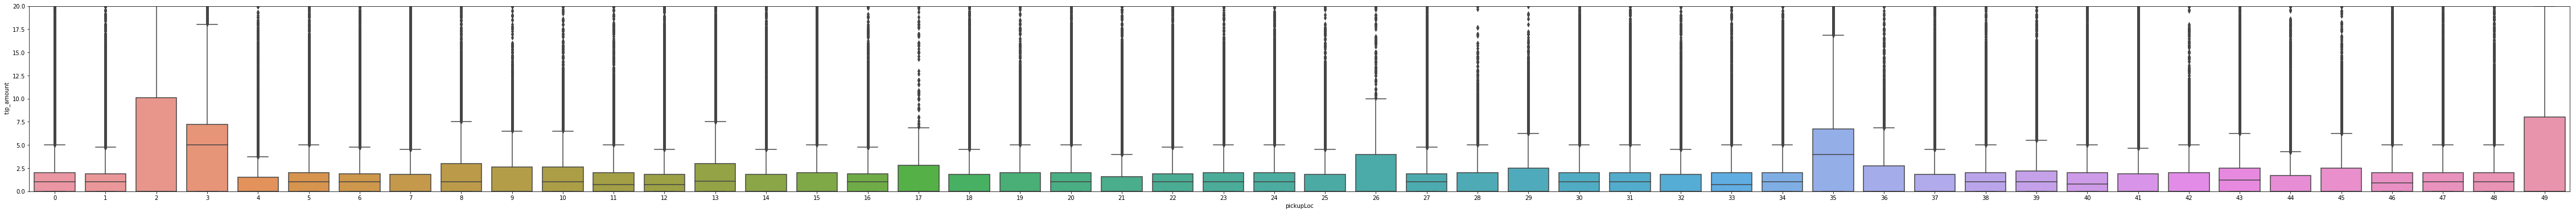

In [75]:
columnName = 'pickupLoc'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(80, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
fig.axis(ymin=0, ymax=20);

In [77]:
dropoffLocations = pd.concat([#full_tripdata[' pickup_longitude'],
                        #full_tripdata[' pickup_latitude'],
                        full_tripdata[' dropoff_longitude'],
                        full_tripdata[' dropoff_latitude'],
                        # full_tripdata[' fare_amount'],
                        # np.log(full_tripdata[' trip_time_in_secs']+1)，
                        # full_tripdata[' tip_amount'],
                        ],axis=1)
print dropoffLocations.describe()
full_tripdata["dropoffLoc"] = kmeammodel.predict(dropoffLocations.as_matrix())

        dropoff_longitude   dropoff_latitude
count        1.482921e+07       1.482921e+07
mean        -7.397472e+01       4.075143e+01
std          3.837641e-02       3.595054e-02
min         -8.050000e+01       3.368037e+01
25%         -7.399161e+01       4.073556e+01
50%         -7.398048e+01       4.075394e+01
75%         -7.396500e+01       4.076857e+01
max         -6.742735e+01       4.775000e+01


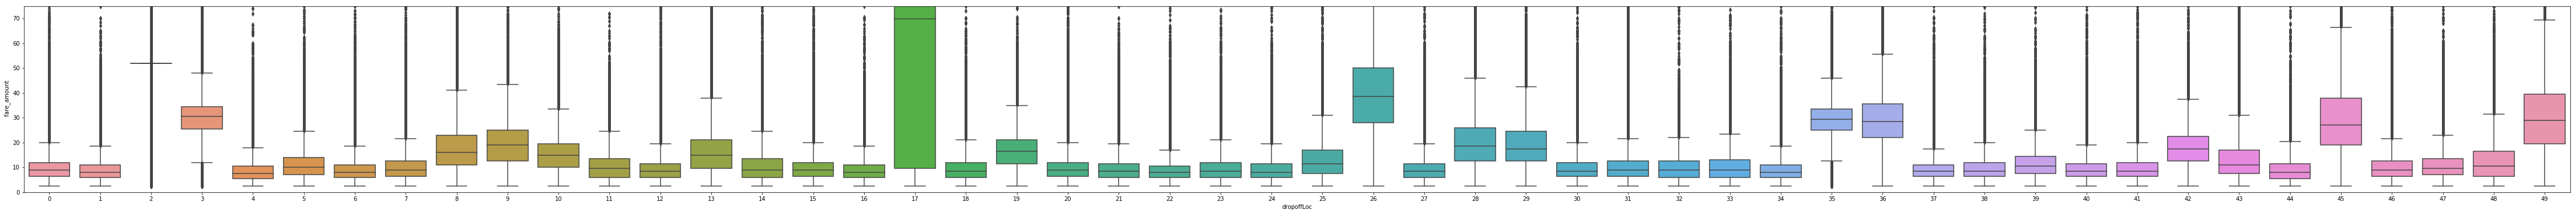

In [78]:
columnName = 'dropoffLoc'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(80, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
fig.axis(ymin=0, ymax=75);

# Hyposis Test,  Are people from certain area more generous than people from other areas ?

In [107]:
full_tripdata.columns

tips = pd.concat([full_tripdata[' tip_amount'],
                 full_tripdata['pickupLoc'],
                 full_tripdata['dropoffLoc']],axis=1)

print tips.columns

tips["giveTips"] = tips[' tip_amount'].apply(lambda tip: tip> 0)

tips_count = tips.groupby(['pickupLoc','dropoffLoc']).count()
# tip_amount_sum = tips.groupby(['pickupLoc','dropoffLoc']).transform('count')

tips2 = tips.groupby(['pickupLoc']).agg({' tip_amount': ['sum','mean'],'giveTips':['sum','count']}).reset_index()

tips2['tips_percent'] = (tips2['giveTips']['sum'] / tips2['giveTips']['count']) * 100
tips2.head()

# tips.pivot(index='pickupLoc', columns='dropoffLoc', values='giveTips')

Index([u' tip_amount', u'pickupLoc', u'dropoffLoc'], dtype='object')


pickupLoc    tip_amount            giveTips         tips_percent
                      sum      mean       sum   count             
0         0  7.889569e+05  1.278278  328435.0  617203    53.213448
1         1  3.379702e+05  1.193512  158779.0  283173    56.071377
2         2  1.048546e+06  4.385443  112211.0  239097    46.931162
3         3  6.564047e+05  4.212637   95722.0  155818    61.431927
4         4  4.097752e+05  0.919156  201505.0  445817    45.199039

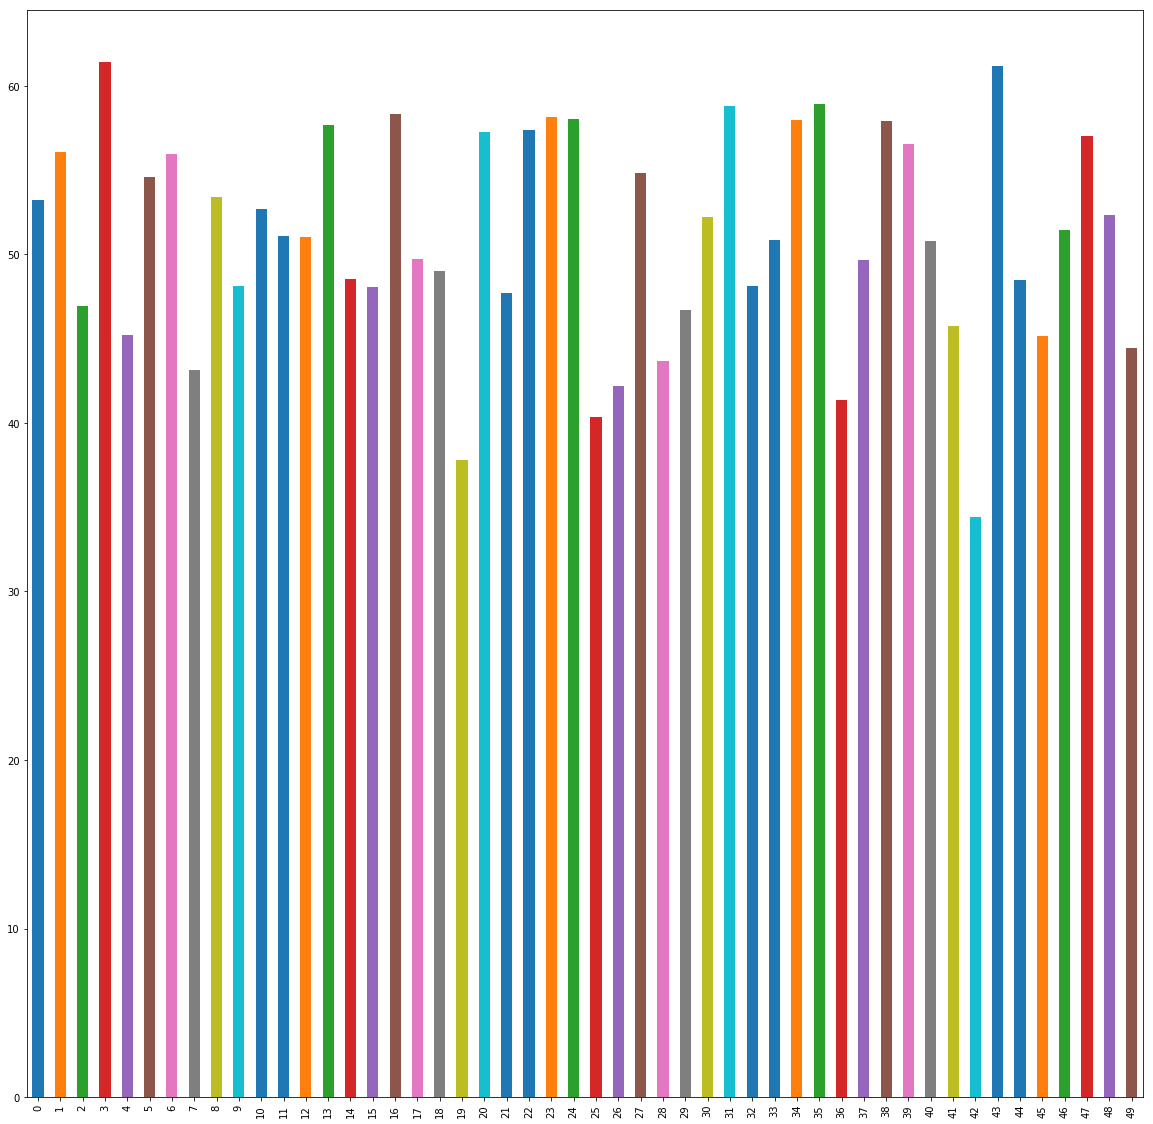

In [109]:
tips2["tips_percent"].plot.bar(figsize=(20,20))

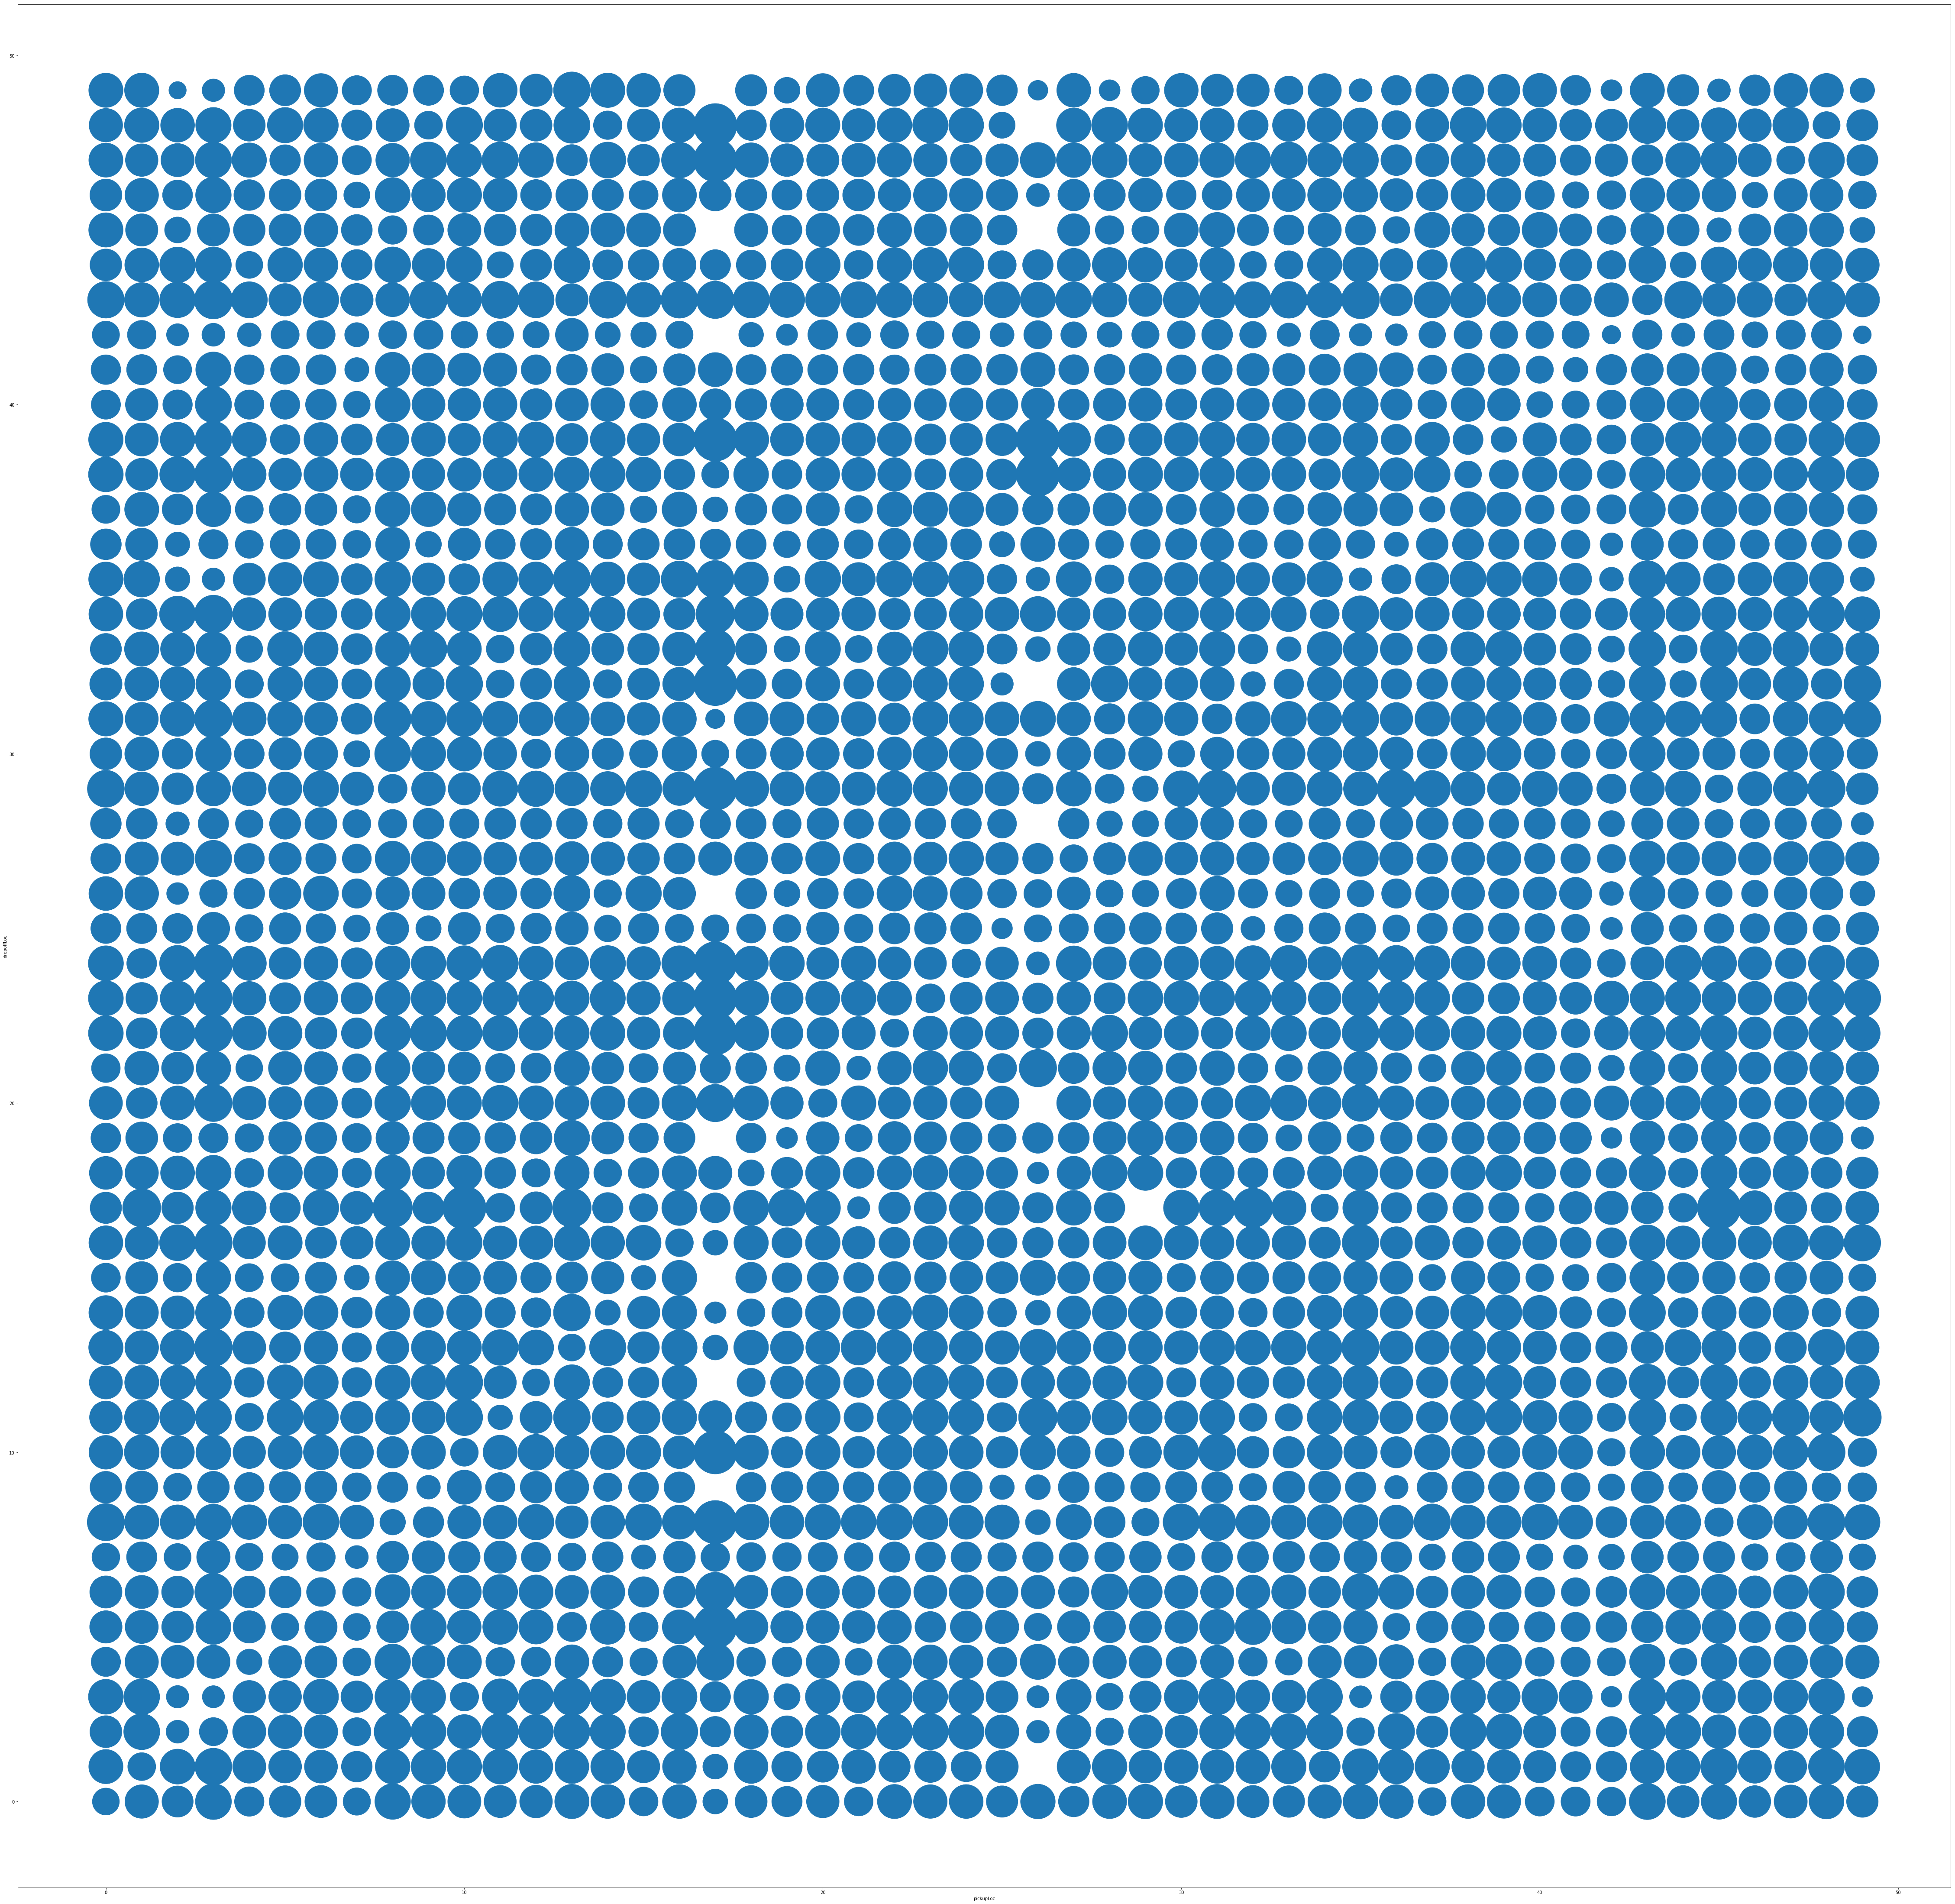

In [106]:
tips2.plot.scatter(x='pickupLoc',y='dropoffLoc',s=tips2['tips_percent']*100,figsize=(80,80))


In [ ]:
tips2.groupby(['pickupLoc'])['']

In [ ]:
training = full_tripdata.drop(columns=[' pickup_datetime',
                                       ' dropoff_datetime',
                                       ' trip_time_in_secs',
                                       ' trip_distance',
                                       ' dropoff_longitude',
                                       ' dropoff_latitude',
                                       ' surcharge',
                                       ' mta_tax',
                                       ' tolls_amount',
                                       ' total_amount',
                                       ' passenger_count',
                                       ' payment_type',
                                       ' pickup_longitude',
                                       ' pickup_latitude'])

# Correlation matrix with only fare , tip , locations, weekday and hourofday

In [ ]:
corrmat = training.corr()

k = 6
cols = corrmat.nlargest(k, ' fare_amount')[' fare_amount'].index
cm = np.corrcoef(full_tripdata[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
training['weekday'] = training['weekday'].astype('category')
training['hourofday'] = training['hourofday'].astype('category')
training['pickupLoc'] = training['pickupLoc'].astype('category')
training['dropoffLoc'] = training['dropoffLoc'].astype('category')

In [ ]:
data = pd.concat([full_tripdata[' fare_amount'], full_tripdata["pickupLoc"], full_tripdata["dropoffLoc"]],axis=1)

data.groupby(by=['pickupLoc','dropoffLoc']).count().sort_values(by=[" fare_amount"],ascending=False).head()


# h. Which trip has the highest standard deviation of travel time?

In [ ]:
trips = full_tripdata.copy()

In [ ]:
trips.groupby(by=[' pickup_longitude',' pickup_latitude',' dropoff_longitude',' dropoff_latitude']).count().sort_values(by=[" trip_time_in_secs"],ascending=False).head()

# Only looking at coordinates cannot take into account of very close pick up and drop off locations

In [ ]:
training["trip_time_in_secs"] = full_tripdata.iloc[:,3]
training["trip_distance"] = full_tripdata.iloc[:,4]

In [ ]:
training.groupby(by=['pickupLoc','dropoffLoc']).count().sort_values(by=["trip_time_in_secs"],ascending=False).head()

In [ ]:
training.groupby(by=['pickupLoc','dropoffLoc']).std().sort_values(by=["trip_time_in_secs"],ascending=False).head()

In [ ]:
biggestdeviationTrips = training.loc[(training['pickupLoc'] == 24) & (training['dropoffLoc'] == 49)]
biggestdeviationTrips

In [ ]:
biggestdeviationTrips = full_tripdata.loc[(full_tripdata['pickupLoc'] == 24) & (full_tripdata['dropoffLoc'] == 49)]
biggestdeviationTrips

# i. Which trip has most consistent fares?

In [ ]:
training.groupby(by=['pickupLoc','dropoffLoc']).std().sort_values(by=[" fare_amount"]).head(10)

In [ ]:
fare_std = training.groupby(by=['pickupLoc','dropoffLoc']).std().sort_values(by=[" fare_amount"])
fare_std = fare_std.loc[fare_std[" fare_amount"] == 0]
print fare_std.describe()
fare_std

In [ ]:
biggestdeviationTrips = full_tripdata.loc[(full_tripdata['pickupLoc'] == 2) & (full_tripdata['dropoffLoc'] == 16)]
biggestdeviationTrips

# g. What are the top 10 busiest locations of the city?

In [ ]:
busiestLoc = training.groupby(by=['pickupLoc']).count().sort_values(by=[" fare_amount"],ascending=False).head(10)
busiestLoc

In [ ]:
busiestLoc_cluster_centers = [kmeammodel.cluster_centers_[x] for x in busiestLoc.index]
print busiestLoc_cluster_centers

#pickup = full_tripdata.iloc[:,5:7]
#pickup.plot.scatter(x=" pickup_longitude",y=" pickup_latitude",figsize=(15,15),ylim=(40.62,40.87))
#print pickup.describe()
#pickup = pickup.as_matrix()
#print pickup.describe()
#fig = plt.figure(figsize=(15,15))
#ax1 = fig.add_subplot(111)
#ax1.scatter(pickup[:,0], pickup[:,1], s=10, c='b', marker="s", label='loc')
#ax1.scatter(busiestLoc_cluster_centers[:,0],busiestLoc_cluster_centers[:,1], s=120, c='r', marker="o", label='center')
#plt.legend(loc='upper left');
#plt.show()